In [2]:
#Importando librerías
import numpy as np
from scipy import interpolate
import matplotlib . pyplot as plt
from numpy.polynomial.polynomial import Polynomial as poly

In [3]:
#definiendo la función original 1.a
def funcion_a(x: float):
    return pow(0.3, abs(x)) * np.sin(4*x) - np.tanh(2*x) + 2

dominio_a, dx = np.linspace(-4, 4, 1000, retstep=True)
imagen_a = funcion_a(dominio_a)

In [4]:
#definiendo los valores de muestra
def nueva_muestra(n: int):
    n_valores_x, dnx = np.linspace(-4, 4, n, retstep=True)
    n_valores_y = funcion_a(n_valores_x)
    return n_valores_x, n_valores_y, dnx

datos_x_a, datos_y_a, delta_x_a = nueva_muestra(5)

In [5]:
# Calcular los factores de Lagrange
def Lagrange_Poly(tabla_x, tabla_y, factores=False)-> poly:
    ''' Devuelve el polinomio interpolador de Lagrange, 
        utilice el flag factores=True para recibir (polinomio, lista_de_polinomios)'''

    n = len(tabla_x)
    x_incognita = poly(np.array([0,1]))
    factores_L_k = []
    sumatoria=0

    for k in range(n):
        producto = tabla_y[k]
        for i in range(n):
            if k != i:
                producto = producto * (x_incognita - tabla_x[i])/(tabla_x[k]-tabla_x[i])
        factores_L_k.append(producto)
        sumatoria = sumatoria + producto
    if factores==True:
        return sumatoria, factores_L_k
    else:
        return sumatoria

## CHEVISHEV


In [6]:
def chev_nodes_1k(n, a, b):
    nodes = []
    median = (b-a)/2
    mean = (a+b)/2
    for k in range(n):
        n_k = mean + median * np.cos(np.pi*(2*k+1)/(2*n))
        nodes.append(n_k)
    return np.array(nodes)

def chev_nodes_2k(n, a, b):
    nodes = []
    median = (b-a)/2
    mean = (a+b)/2
    for k in range(n+1):
        n_k = mean + median * np.cos(np.pi*k/n)
        nodes.append(n_k)
    return np.array(nodes)

# Graficar

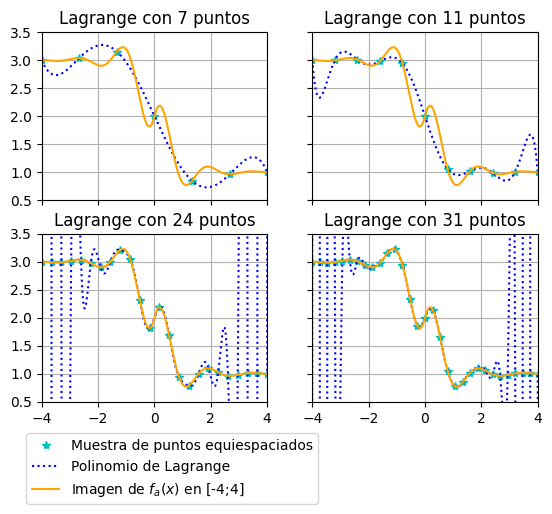

In [56]:
#Warning: experimental
fig, axes = plt.subplots(2,2,  sharey=True, sharex=True)
#fig = plt.figure(figsize=(8,20))

for index, vals in enumerate((7,11,24,31)):
    muestra_x_i, muestra_y_i, dmxi = nueva_muestra(vals)

    poly_i = Lagrange_Poly(muestra_x_i, muestra_y_i)

    imagen_i = poly_i(dominio_a)
    
    axes[index//2, index%2].plot(muestra_x_i, muestra_y_i, 'c*',label='Muestra de puntos equiespaciados')

    axes[index//2, index%2].plot(dominio_a, imagen_i, 'b:', label='Polinomio de Lagrange')


    axes[index//2, index%2].plot(dominio_a, imagen_a, color='orange', label='Imagen de $f_a(x)$ en [-4;4]')
    axes[index//2, index%2].title.set_text('Lagrange con ' + str(vals) + ' puntos')
    #axes[index//2, index%2].legend()
    axes[index//2, index%2].grid(True)
    #axes[(vals-3)//2, vals%2].legend()
    #plt.plot(muestra_x_i, muestra_y_i, 'x',label='f Muestra con {} puntos'.format(str(vals)))
    #plt.plot(dominio_a, imagen_i, ':', label='Polinomio {}'.format(str(vals)))
plt.legend(loc="lower left", bbox_to_anchor=(-1.3,-0.65))
plt.ylim(0.5,3.5)
plt.xlim(-4,4)
plt.show()

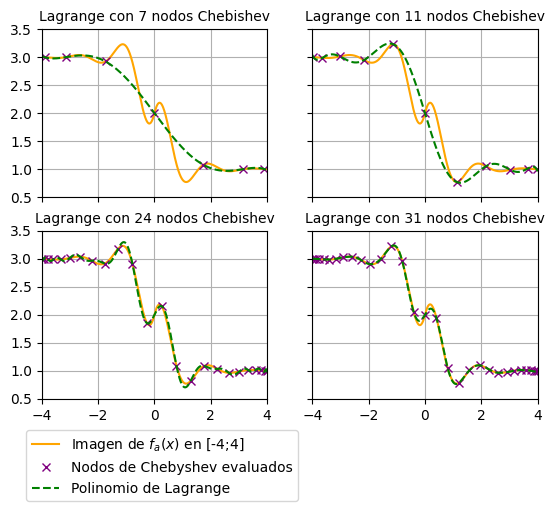

In [53]:
#Warning: experimental
fig, axes = plt.subplots(2,2,  sharey=True, sharex=True)
#fig = plt.figure(figsize=(8,20))

for index, vals in enumerate((7,11,24,31)):
    cheb_n_nodes = chev_nodes_1k(vals, -4, 4)
    cheb_n_image = funcion_a(cheb_n_nodes)

    chev_interpolation = Lagrange_Poly(cheb_n_nodes, cheb_n_image)
    
    imagen_c = chev_interpolation(dominio_a)
    
    axes[index//2, index%2].plot(dominio_a, imagen_a, color='orange', label='Imagen de $f_a(x)$ en [-4;4]')
    axes[index//2, index%2].plot(cheb_n_nodes, cheb_n_image, 'x', color='purple', label='Nodos de Chebyshev evaluados')  
    axes[index//2, index%2].plot(dominio_a, imagen_c, 'g--', label='Polinomio de Lagrange')
    axes[index//2, index%2].title.set_text('Lagrange con ' + str(vals) + ' nodos Chebishev')
    axes[index//2, index%2].title.set_size(10)
    axes[index//2, index%2].grid(True)
plt.legend(loc="lower left", bbox_to_anchor=(-1.3,-0.65))
plt.ylim(0.5,3.5)
plt.xlim(-4,4)
plt.show()

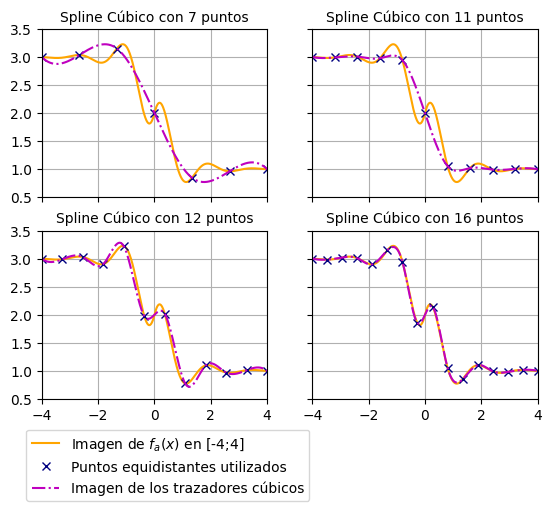

In [68]:
#Warning: experimental
fig, axes = plt.subplots(2,2,  sharey=True, sharex=True)

for index, vals in enumerate((7,11,12,16)):
    muestra_x_i, muestra_y_i, dmxi = nueva_muestra(vals)

    f_a_splines=interpolate.CubicSpline(muestra_x_i, muestra_y_i)
    imagen_splines_f_a = f_a_splines(dominio_a)
    
    axes[index//2, index%2].plot(dominio_a, imagen_a, color='orange', label='Imagen de $f_a(x)$ en [-4;4]')
    axes[index//2, index%2].plot(muestra_x_i, muestra_y_i, 'x', color='navy', label='Puntos equidistantes utilizados')  
    axes[index//2, index%2].plot(dominio_a, imagen_splines_f_a, 'm-.', label='Imagen de los trazadores cúbicos')
    axes[index//2, index%2].title.set_text('Spline Cúbico con ' + str(vals) + ' puntos')
    axes[index//2, index%2].title.set_size(10)
    axes[index//2, index%2].grid(True)
plt.legend(loc="lower left", bbox_to_anchor=(-1.3,-0.65))
plt.ylim(0.5,3.5)
plt.xlim(-4,4)
plt.show()

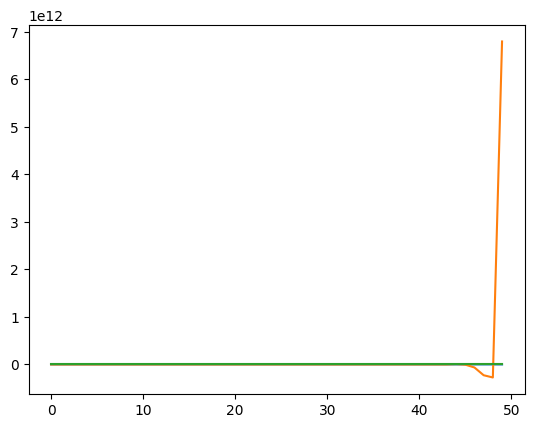

In [72]:
tol=50

delta_poly=np.zeros(tol)
delta_cheb=np.zeros(tol)
delta_splines=np.zeros(tol)
gax=np.array(range(tol))

for n_puntos in range(3,tol):
    muestra_x_i, muestra_y_i, dmxi = nueva_muestra(n_puntos)

    f_a_splines=interpolate.CubicSpline(muestra_x_i, muestra_y_i)
    imagen_splines_f_a = f_a_splines(dominio_a)

    cheb_n_nodes = chev_nodes_1k(n_puntos, -4, 4)
    cheb_n_image = funcion_a(cheb_n_nodes)
    chev_interpolation = Lagrange_Poly(cheb_n_nodes, cheb_n_image)
    imagen_c = chev_interpolation(dominio_a)

    poly_i = Lagrange_Poly(muestra_x_i, muestra_y_i)
    imagen_i = poly_i(dominio_a)

    delta_poly[n_puntos]=sum(imagen_a-imagen_i)
    delta_cheb[n_puntos]=sum(imagen_a-imagen_c)
    delta_splines[n_puntos]=sum(imagen_a-imagen_splines_f_a)

plt.plot(gax, delta_cheb, gax, delta_poly, gax, delta_splines)
plt.show()



In [ ]:
test = chev_nodes_2k(9,-4, 4)
print(test)

[ 4.          3.75877048  3.06417777  2.          0.69459271 -0.69459271
 -2.         -3.06417777 -3.75877048 -4.        ]


## Zona de prueba abajo a continuación

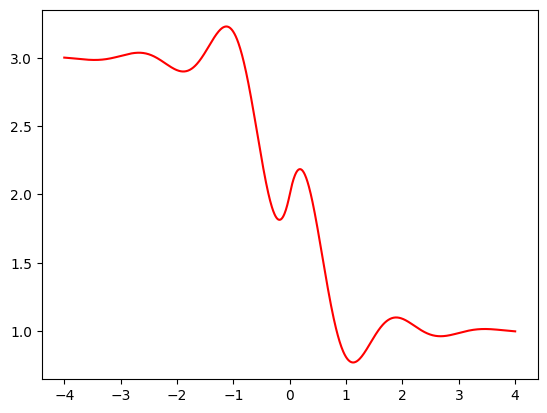

In [ ]:
plt.plot(dominio_a, imagen_a, 'r-')

plt.show()

In [ ]:
a = poly(np.array([1, 2]))
b = poly(np.array([5, 3]))
c= a*b
d= c(dominio_a)
print(str(c))

5.0 + 13.0·x + 6.0·x²


In [ ]:
for h in range(7):
    print(h%2)

0
1
0
1
0
1
0
